In [6]:
import numpy as np
import matplotlib.pyplot as plt
import decimal
from decimal import Decimal as Dec

In [7]:
decimal.getcontext().prec = 3

The lagrangian has a quadratic term and zero order term in terms of $\frac{\partial q}{\partial t}$

L = L_2 - L_0

Therefore H = L_2 + L_0

In [8]:
L_2 = 1/2*(x_1_dot**2 + y_1_dot**2) + 1/2*(x_2_dot**2 + y_2_dot**2)

L_0 =  ( -1/2 * (complex(x_1,y_1) + Lambda_1*(complex(x_2,y_2))**3 )(complex(x_1,-y_1) + Lambda_1*(complex(x_2,-y_2))**3) 
         -1/2 * (complex(x_2,y_2) + Lambda_2*(complex(x_1,y_1))**3 )(complex(x_2,-y_2) + Lambda_2*(complex(x_1,-y_1))**3) )

# Define Lagrangian
L = L_2 - L_0

NameError: name 'x_1_dot' is not defined

In [9]:
# Define Hamiltonian
H = 1/2*(p_x_1**2 + p_y_1**2) + 1/2*(p_x_2**2 + p_y_2**2) + L_0

NameError: name 'p_x_1' is not defined

In [10]:
def simulation(x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2, 
               p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2):

    i = 0

    # Timestep
    delta_t = Dec(0.0005)

    # Coefficients
    Lambda_1 = 0.001
    Lambda_2 = 0.0025

    # Initial coordinates 
    old_coordinates = [x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2, 
               p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2]

    # Coordinates list to record simulation dynamics
    global coordinates_list 
    coordinates_list = [[x_1], [x_2], [y_1], [y_2], 
               [p_x_1], [p_x_2], [p_y_1], [p_y_2], 
               [p_x_dot_1], [p_x_dot_2], [p_y_dot_1], [p_y_dot_2]]


    # Repeating algorithm
    while i < 4890:
        # b) velocity Verlet 1 to get new positions from old positions, momentums and rate of change of momentums

        x_1_old = Dec(old_coordinates[0])
        x_2_old = Dec(old_coordinates[1])
        y_1_old = Dec(old_coordinates[2])
        y_2_old = Dec(old_coordinates[3])
        p_x_1_old = Dec(old_coordinates[4])
        p_x_2_old = Dec(old_coordinates[5])
        p_y_1_old = Dec(old_coordinates[6])
        p_y_2_old = Dec(old_coordinates[7])
        p_x_dot_1_old = Dec(old_coordinates[8])
        p_x_dot_2_old = Dec(old_coordinates[9])
        p_y_dot_1_old = Dec(old_coordinates[10])
        p_y_dot_2_old = Dec(old_coordinates[11])


        x_1_new = Dec(x_1_old + p_x_1_old * delta_t + Dec(1/2) * p_x_dot_1_old * delta_t**2)
        x_2_new = Dec(x_2_old + p_x_2_old * delta_t + Dec(1/2) * p_x_dot_2_old * delta_t**2)
        y_1_new = Dec(y_1_old + p_y_1_old * delta_t + Dec(1/2) * p_y_dot_1_old * delta_t**2)
        y_2_new = Dec(y_2_old + p_y_2_old * delta_t + Dec(1/2) * p_y_dot_2_old * delta_t**2)

        # c) Use Hamiltonian canonical equations to get new p_dot values

        p_x_dot_1_new = Dec(Dec(-1/2) - Dec(Lambda_2/2 * 9) * (Dec(float(x_1_new)**4) + Dec(2)*x_1_new*y_1_new + Dec(float(y_1_new)**4)))
        p_x_dot_2_new = Dec(Dec(-1/2) - Dec(Lambda_1/2 * 9) * (Dec(float(x_2_new)**4) + Dec(2)*x_2_new*y_2_new + Dec(float(y_2_new)**4)))
        p_y_dot_1_new = Dec(Dec(-1/2) - Dec(Lambda_2/2 * 9) * (Dec(float(x_1_new)**4) + Dec(2)*x_1_new*y_1_new + Dec(float(y_1_new)**4)))
        p_y_dot_2_new = Dec(Dec(-1/2) - Dec(Lambda_1/2 * 9) * (Dec(float(x_2_new)**4) + Dec(2)*x_2_new*y_2_new + Dec(float(y_2_new)**4)))


        # d) Use Velocity Verlet 2 to get new momentums

        p_x_1_new = Dec(p_x_1_old + Dec(1/2) * (p_x_dot_1_new + p_x_dot_1_old) * delta_t)
        p_x_2_new = Dec(p_x_2_old + Dec(1/2) * (p_x_dot_2_new + p_x_dot_2_old) * delta_t)
        p_y_1_new = Dec(p_y_1_old + Dec(1/2) * (p_y_dot_1_new + p_y_dot_1_old) * delta_t)
        p_y_2_new = Dec(p_y_2_old + Dec(1/2) * (p_y_dot_2_new + p_y_dot_2_old) * delta_t)

        new_coordinates = [x_1_new, x_2_new, y_1_new, y_2_new, 
                           p_x_1_new, p_x_2_new, p_y_1_new, p_y_2_new,
                           p_x_dot_1_new, p_x_dot_2_new, p_y_dot_1_new, p_y_dot_2_new]

        # Recording position, momentum, and rate of change of momentum every 10th step
        if i % 10 == 0:

            h = 0

            while h < len(coordinates_list):
                coordinates_list[h].append(new_coordinates[h])
                h += 1

        # Update new coordinates

        old_coordinates = new_coordinates
        print(i)
        i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290


4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362


[[0.5,
  Decimal('0.5000000000000000000000000000'),
  Decimal('0.4999930676731999458099814666'),
  Decimal('0.4999735311201005058500230098'),
  Decimal('0.4999413903528329990481583008'),
  Decimal('0.4998966453913535061450910050'),
  Decimal('0.4998392962634400960095124895'),
  Decimal('0.4997693430046889648337351849'),
  Decimal('0.4996867856585094887994466159'),
  Decimal('0.4995916242761181909692857489'),
  Decimal('0.4994838589165316233256830057'),
  Decimal('0.4993634896465581650439318646'),
  Decimal('0.4992305165407887382517150060'),
  Decimal('0.4990849396815864426923071655'),
  Decimal('0.4989267591590751108733268495'),
  Decimal('0.4987559750711267854472074986'),
  Decimal('0.4985725875233481207334290116'),
  Decimal('0.4983765966290657104560380063'),
  Decimal('0.4981680025093103439329150663'),
  Decimal('0.4979468052928001931157389854'),
  Decimal('0.4977130051159229330414642171'),
  Decimal('0.4974666021227167984174697999'),
  Decimal('0.4972075964648505792231834982'),
  D

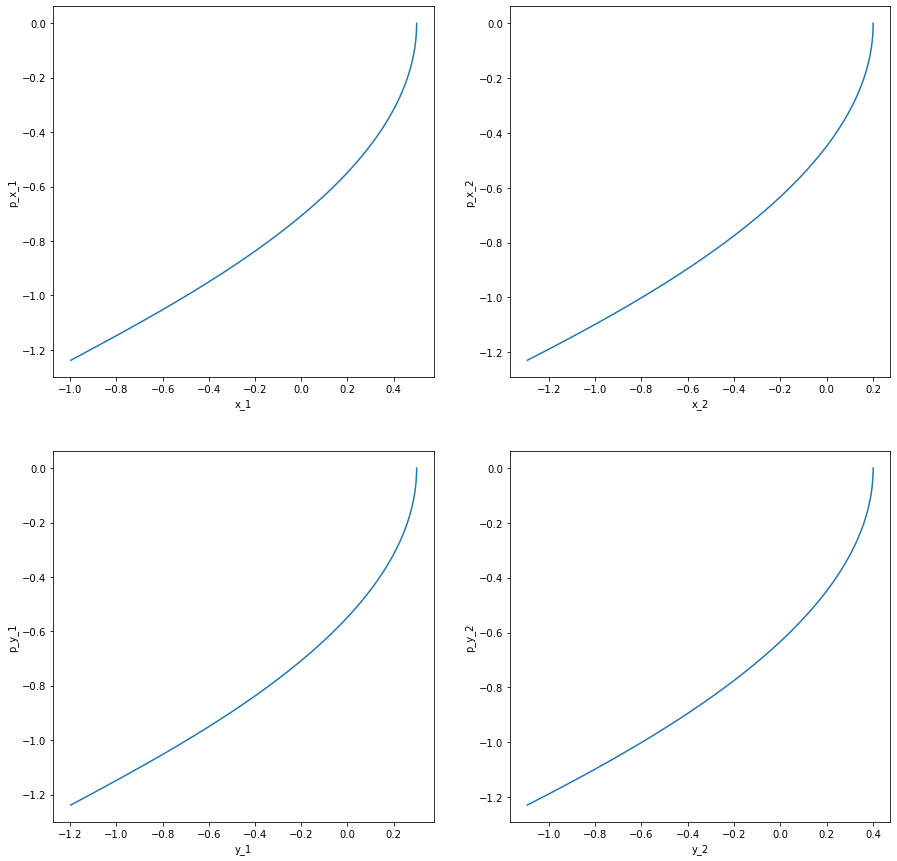

In [11]:
plt.figure(figsize = (15,15))

simulation (.5,0.2,0.3,0.4,0,0,0,0,0,0,0,0)
plt.subplot(2,2,1)
plt.plot(coordinates_list[0], coordinates_list[4])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(coordinates_list[1], coordinates_list[5])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(coordinates_list[2], coordinates_list[6])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(coordinates_list[3], coordinates_list[7])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

coordinates_list

In [12]:
def H(x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2):
    
    L_0 =  ( 1/2 * (complex(x_1,y_1) + Lambda_1*(complex(x_2,y_2))**3 )*(complex(x_1,-y_1) + Lambda_1*(complex(x_2,-y_2))**3) 
         +1/2 * (complex(x_2,y_2) + Lambda_2*(complex(x_1,y_1))**3 )*(complex(x_2,-y_2) + Lambda_2*(complex(x_1,-y_1))**3) )
    
    L_2 = 1/2*(p_x_1**2 + p_y_1**2) + 1/2*(p_x_2**2 + p_y_2**2)
    
    return L_0 + L_2

def H_real(x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2):
    
    L_0 =
    
    L_2 = 1/2*(p_x_1**2 + p_y_1**2) + 1/2*(p_x_2**2 + p_y_2**2)


In [13]:
H(.5, .2, .3, .4, 0, 0, 0, 0, 0, 0, 0, 0, 0.001, 0.0025)

(0.270144326825+0j)

In [14]:
len(coordinates_list[0])

490

In [15]:
H(np.array(coordinates_list[0]), np.array(coordinates_list[1]), np.array(coordinates_list[2]), np.array(coordinates_list[3]),
  np.array(coordinates_list[4]), np.array(coordinates_list[5]), np.array(coordinates_list[6]), np.array(coordinates_list[7]),
  np.array(coordinates_list[8]), np.array(coordinates_list[9]), np.array(coordinates_list[10]), np.array(coordinates_list[11]),0.001, 0.0025)

TypeError: only length-1 arrays can be converted to Python scalars

In [75]:
x_1=5
y_1=6
x_2=78
y_2=9
Lambda = 0.01
L_0 =  (complex(x_1,y_1))*complex(x_2,-y_2)